# Create an ARMA process

In this basic example we are going to build an ARMA process defined by its linear recurrence coefficients.

The creation of an ARMA model requires the data of the AR and MA
coefficients which are:

-  a list of scalars in the unidmensional case :
   $(a_1, \dots, a_p)$ for the AR-coefficients and
   $(b_1, \dots, b_q)$ for the MA-coefficients

-  a list of square matrix
   $(\underline{\underline{A}}_{\, 1}, \dots, \underline{\underline{A}}{\, _p})$ for the
   AR-coefficients and
   $(\underline{\underline{B}}_{\, 1}\, \dots, \underline{\underline{B}}_{\, q})$ for the
   MA-coefficients

Il also requires the definition of a white noise
$\underline{\varepsilon}$ that contains the same time grid as the
one of the process.
The current state of an ARMA model is characterized by its last
$p$ values and the last $q$ values of its white noise. It
is possible to get that state thanks to the methods *getState*.
It is possible to create an ARMA with a specific current state. That
specific current state is taken into account to generate possible
futurs but not to generate realizations (in order to respect the
stationarity property of the model).
At the creation step, we check whether the process
$ARMA(p,q)$ is stationnary.
When the process is not stationary, the user is warned by a message.

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

In [2]:
# Define the recurrence coefficients AR, MA (4,2)
myARCoef = ot.ARMACoefficients([0.4, 0.3, 0.2, 0.1])
myMACoef = ot.ARMACoefficients([0.4, 0.3])

In [3]:
# Define the white noise distribution of the recurrent relation.
myTimeGrid = ot.RegularGrid(0.0, 0.1, 10)
myWhiteNoise = ot.WhiteNoise(ot.Triangular(-1.0, 0.0, 1.0), myTimeGrid)

In [4]:
# Create the process:
process = ot.ARMA(myARCoef, myMACoef, myWhiteNoise)
print(process)

ARMA(X_{0,t} + 0.4 X_{0,t-1} + 0.3 X_{0,t-2} + 0.2 X_{0,t-3} + 0.1 X_{0,t-4} = E_{0,t} + 0.4 E_{0,t-1} + 0.3 E_{0,t-2}, E_t ~ Triangular(a = -1, m = 0, b = 1))


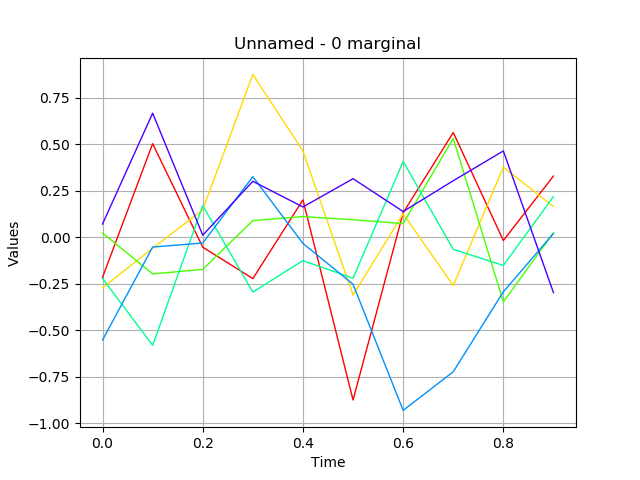

In [5]:
# Draw a sample
sample = process.getSample(6)
sample.drawMarginal(0)